In [7]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [ ]:
cfg = get_dataset_cfg(WHARDatasetID.USC_HAD)

cfg.parallelize = True
cfg.in_memory = True
force_recompute = False
# force_recompute = [False, True, True]

In [9]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-11 11:33:27,425 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:33:27,426 - whar-datasets - INFO - Running DownloadingStep
2026-02-11 11:33:27,426 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-11 11:33:27,427 - whar-datasets - INFO - Hash is up to date
2026-02-11 11:33:27,428 - whar-datasets - INFO - Downloading usc_had
2026-02-11 11:33:27,968 - whar-datasets - INFO - Extracting usc_had
2026-02-11 11:33:28,367 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:33:28,367 - whar-datasets - INFO - Running ParsingStep
2026-02-11 11:33:28,367 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-11 11:33:28,368 - whar-datasets - INFO - Hash is up to date
2026-02-11 11:33:28,368 - whar-datasets - INFO - Checking download
2026-02-11 11:33:28,368 - whar-datasets - INFO - Download exists
2026-02-11 11:33:28,369 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 840/840 [00:03<00:00, 237.88it/s]
2026-02-11 11

[########################################] | 100% Completed | 2.41 sms
[########################################] | 100% Completed | 2.51 s


2026-02-11 11:33:38,093 - whar-datasets - INFO - Common format validated.
2026-02-11 11:33:38,094 - whar-datasets - INFO - Compute windowing
2026-02-11 11:33:38,094 - whar-datasets - INFO - Selecting activities
2026-02-11 11:33:38,098 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 15.39 ss
[########################################] | 100% Completed | 15.49 s


2026-02-11 11:33:53,876 - whar-datasets - INFO - Saving windowing
2026-02-11 11:34:00,067 - whar-datasets - INFO - Loading windowing
2026-02-11 11:34:00,081 - whar-datasets - INFO - activity_ids from 0 to 11
2026-02-11 11:34:00,081 - whar-datasets - INFO - subject_ids from 0 to 13


In [10]:
splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
# splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

subject_1 32062 8015 2600
subject_4 32460 8115 2102
subject_11 30845 7711 4121
subject_3 32228 8056 2393
subject_12 31009 7752 3916
subject_13 31587 7896 3194
subject_2 32515 8128 2034
subject_7 31632 7908 3137
subject_5 32228 8056 2393
subject_10 30925 7731 4021
subject_0 31772 7942 2963
subject_6 32532 8132 2013
subject_9 31097 7774 3806
subject_8 30955 7738 3984


In [11]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-11 11:34:00,172 - whar-datasets - INFO - Forcing recompute
2026-02-11 11:34:00,173 - whar-datasets - INFO - Running SamplingStep
2026-02-11 11:34:00,173 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-11 11:34:00,175 - whar-datasets - INFO - Hash is not up to date
2026-02-11 11:34:03,807 - whar-datasets - INFO - Computing samples
2026-02-11 11:34:03,808 - whar-datasets - INFO - Getting normalization parameters
2026-02-11 11:34:04,341 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 13.90 s
[########################################] | 100% Completed | 13.93 s


2026-02-11 11:34:18,653 - whar-datasets - INFO - Saving samples
2026-02-11 11:34:19,034 - whar-datasets - INFO - Loading samples


In [12]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)
print(len(loader))

42677


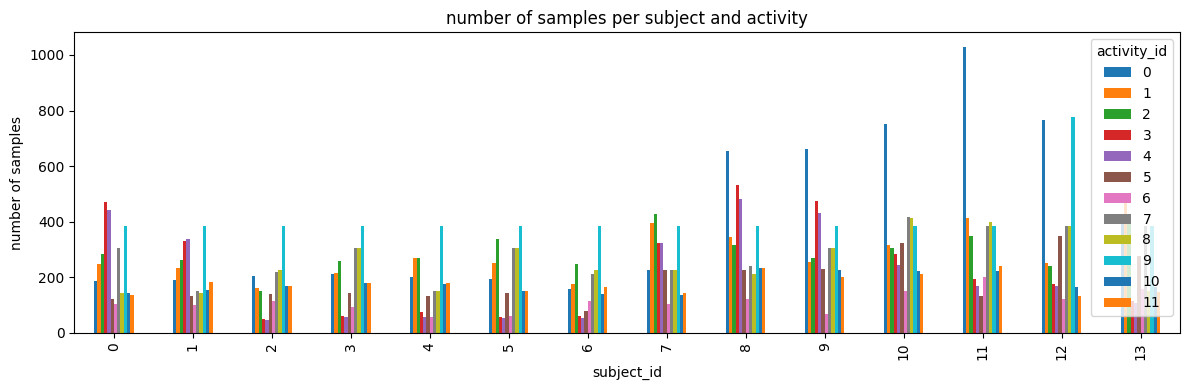

In [13]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: 7, Subject: 12')

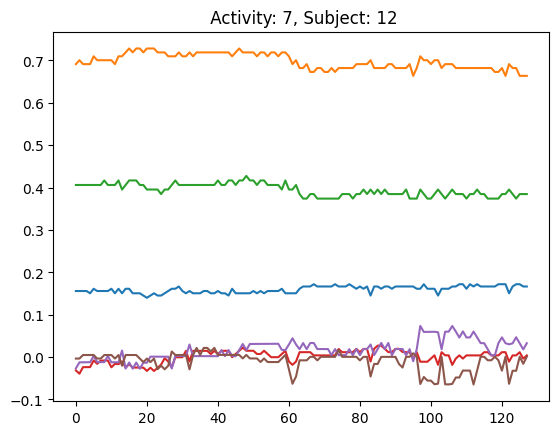

In [17]:
subject_id = None  # 2
activity_id = None  # 3

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")